In [205]:
%%time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

CPU times: total: 0 ns
Wall time: 996 µs


# DATA EXTRACTION

In [206]:
%%time
df = pd.read_csv('cal_housing.csv')

CPU times: total: 31.2 ms
Wall time: 30.1 ms


# DATA EXPLORATION

In [207]:
%%time
df.head()

CPU times: total: 0 ns
Wall time: 0 ns


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [208]:
%%time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
CPU times: total: 15.6 ms
Wall time: 8.98 ms


In [209]:
%%time
df.describe()

CPU times: total: 31.2 ms
Wall time: 22.8 ms


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [210]:
%%time
# Automated program :- Missing Values for each COLUMN
column_list = df.columns
non_null_column_values = [columns for columns in df.columns if df[columns].isnull().sum()<1] 
for attribute in non_null_column_values:
    print(attribute,':' ,np.round(df[attribute].isnull().sum().mean(), 4),'% missing values')
print('\n')
print('non null columns', non_null_column_values) 
print('\n')
null_column_values = [columns for columns in df.columns if df[columns].isnull().sum()>1 ] 
print('NULL COLUMNS == ', null_column_values)

print('Columns with NO NULL Values== ', len(non_null_column_values))
print('Columns with NULL values ==', len(null_column_values))
# INFERENCE : No columns have any missing values

longitude : 0.0 % missing values
latitude : 0.0 % missing values
housing_median_age : 0.0 % missing values
total_rooms : 0.0 % missing values
population : 0.0 % missing values
households : 0.0 % missing values
median_income : 0.0 % missing values
median_house_value : 0.0 % missing values
ocean_proximity : 0.0 % missing values


non null columns ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


NULL COLUMNS ==  ['total_bedrooms']
Columns with NO NULL Values==  9
Columns with NULL values == 1
CPU times: total: 0 ns
Wall time: 6.98 ms


In [211]:
%%time
df[df.total_bedrooms.isnull()== True]

CPU times: total: 0 ns
Wall time: 996 µs


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


# Categorizing into income groups

In [212]:
%%time
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

CPU times: total: 0 ns
Wall time: 2.99 ms


In [213]:
%%time
df

CPU times: total: 0 ns
Wall time: 0 ns


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [214]:
%%time
df1= df.copy()
df2 = df.copy()

CPU times: total: 0 ns
Wall time: 2 ms


Working of Simple Imputer is illustrated in the code bloack below

In [215]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy="median")
#housing_num = df1.drop("ocean_proximity", axis=1)
#imputer.fit(housing_num)

The SimpleImputer function of Sklearn is very commonly used to handle with missing values with a specific value.
But since we are dealing with 5 different strata of  income category we will use MEDIAN_BEDROOMS for the particular
income strata the record belongs to in order to increase the efficacy of our predictive model .

CPU times: total: 62.5 ms
Wall time: 85.8 ms


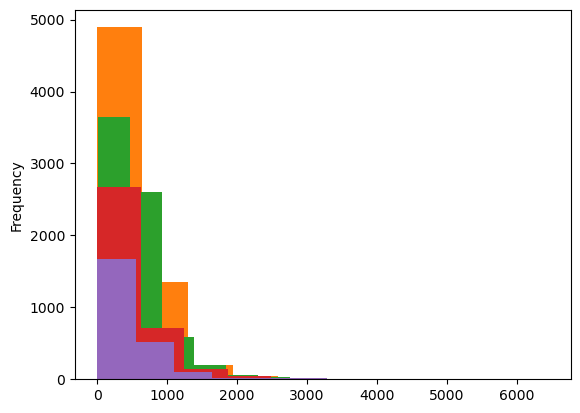

In [216]:
%%time
tmp1 = df2.groupby(['income_cat'])['total_bedrooms'].plot(kind = 'hist')
# since the total_bedrooms follow a highly right skewed distribution we will use MEDIAN AS MEASURE OF CENTRAL TENDENCY

##  MISSING VALUES HANDLING 

In [217]:
%%time
tmp2 = df2.groupby(['income_cat'])['total_bedrooms'].quantile(0.5).to_frame('avg_tb')
tmp2

CPU times: total: 0 ns
Wall time: 0 ns


,avg_tb
income_cat,
1,364.5
2,445.0
3,455.0
4,428.0
5,394.0


In [218]:
%%time
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB
CPU times: total: 0 ns
Wall time: 0 ns


In [219]:
%%time
null_lst = df2[df2.iloc[:,4].isnull()== True].index
for i in null_lst:
    if (df2.iloc[i,10] == 1):
        df2.iloc[int(i),4] = int(tmp2.avg_tb[1])
    elif (df2.iloc[i,10] == 2):
        df2.iloc[int(i),4] = int(tmp2.avg_tb[2])
    elif (df2.iloc[i,10] == 3):
        df2.iloc[int(i),4] = int(tmp2.avg_tb[3])
    elif (df2.iloc[i,10] == 4):
        df2.iloc[int(i),4] = int(tmp2.avg_tb[4])
    elif (df2.iloc[i,10] == 5):
        df2.iloc[int(i),4] = int(tmp2.avg_tb[5])

CPU times: total: 31.2 ms
Wall time: 31.3 ms


In [220]:
%%time
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20640 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB
CPU times: total: 0 ns
Wall time: 0 ns


### Assigning appropiate data-types

In [221]:
%%time
df2.total_rooms = df2.total_rooms.astype(int)
df2.total_bedrooms =df2.total_bedrooms.astype(int)
df2.households =df2.households.astype(int)

CPU times: total: 0 ns
Wall time: 0 ns


In [222]:
%%time
df2

CPU times: total: 0 ns
Wall time: 0 ns


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374,845.0,330,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697,150,356.0,114,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254,485,1007.0,433,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860,409,741.0,349,1.8672,84700.0,INLAND,2


CPU times: total: 172 ms
Wall time: 171 ms


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

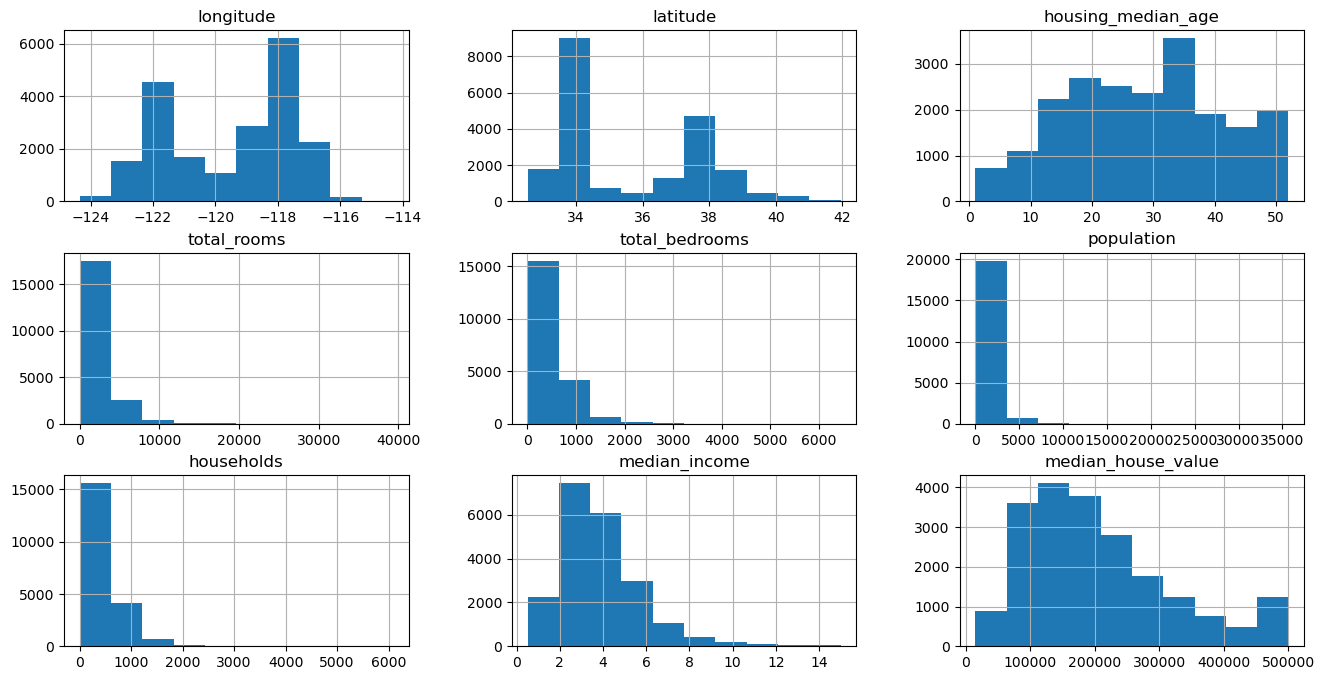

In [223]:
%%time
df2.hist(figsize = (16,8))

CPU times: total: 109 ms
Wall time: 111 ms


<timed exec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

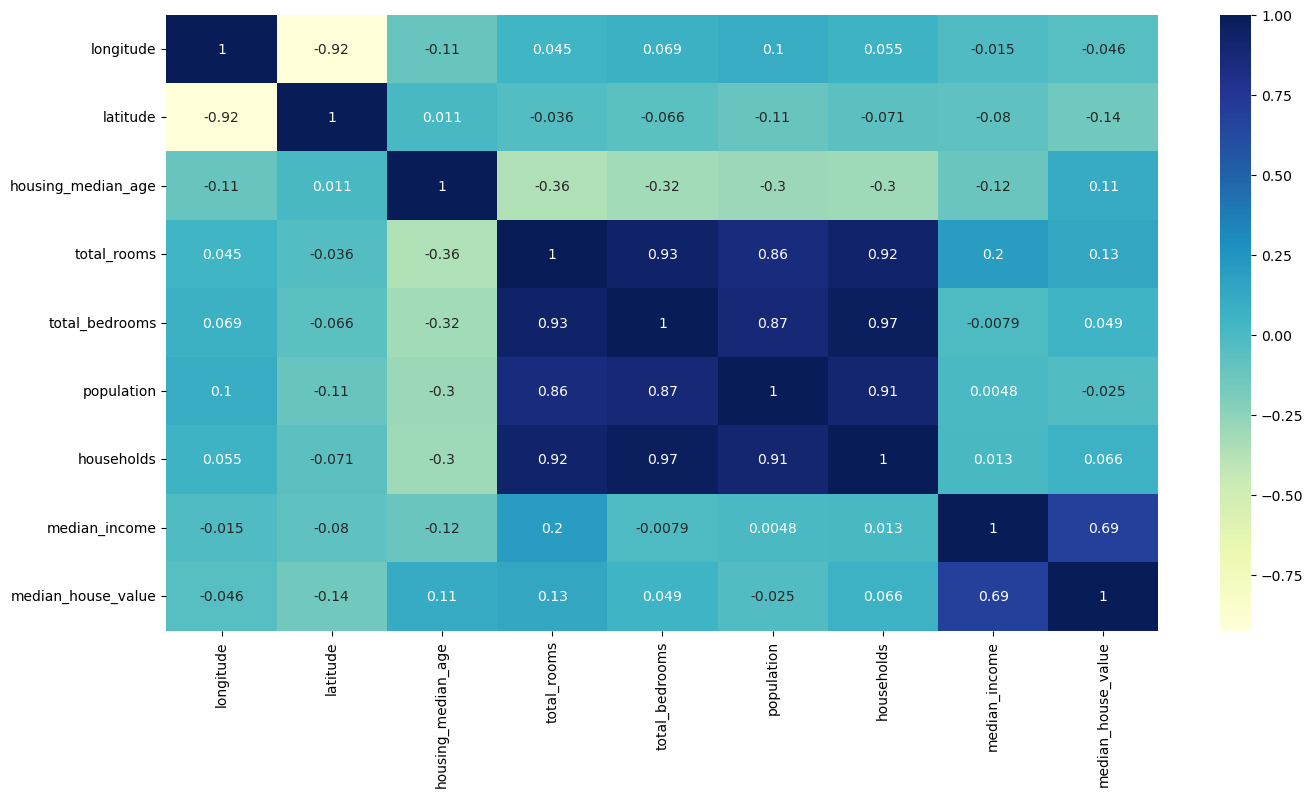

In [224]:
%%time
plt.figure(figsize = (16,8))
sns.heatmap(df2.corr(),annot = True,cmap = 'YlGnBu')

CPU times: total: 1.09 s
Wall time: 1.17 s


<Figure size 5000x5000 with 0 Axes>

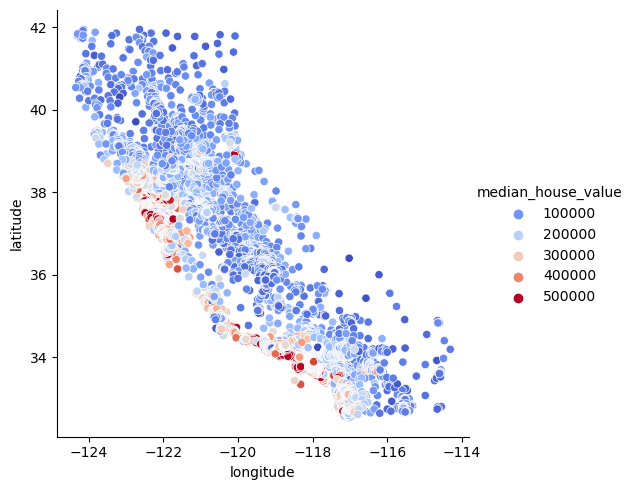

In [225]:
%%time
plt.figure(figsize = (50,50))
sns.relplot(data= df2,x= 'longitude',y= 'latitude',hue= 'median_house_value',palette = 'coolwarm')

# DATA PREPARATION

## OUTLIER REMOVAL

In [226]:
%%time
Df = df2.copy()
print('The original dataset has', len(Df),' rows; including the HOUSE PRICE OUTLIERS')

The original dataset has 20640  rows; including the HOUSE PRICE OUTLIERS
CPU times: total: 0 ns
Wall time: 997 µs


CPU times: total: 31.2 ms
Wall time: 18.2 ms


<Axes: >

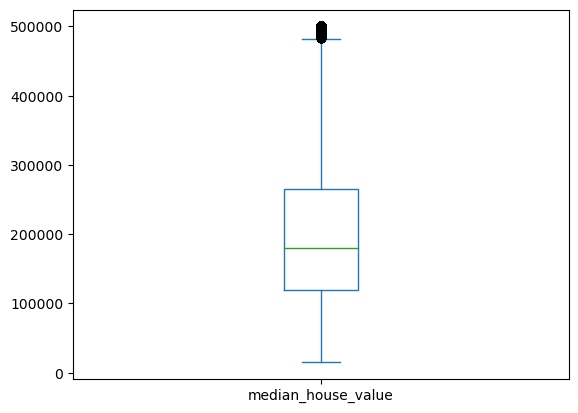

In [227]:
%%time
Df.median_house_value.plot(kind= 'box')

In [228]:
%%time
q1 = Df.median_house_value.quantile(0.25)
q3 = Df.median_house_value.quantile(0.75)
iqr = q3-q1
print('After outlier removal the remaining no. of rows ',len(Df[(Df.median_house_value <=(q3+ (1.5*iqr))) & (Df.median_house_value >= (q1- (1.5*iqr)))]))

After outlier removal the remaining no. of rows  19569
CPU times: total: 0 ns
Wall time: 0 ns


In [229]:

#Df = Df[(Df.median_house_value <=(q3+ (1.5*iqr))) & (Df.median_house_value >= (q1- (1.5*iqr)))]


In [230]:
%%time
Df

CPU times: total: 0 ns
Wall time: 0 ns


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374,845.0,330,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697,150,356.0,114,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254,485,1007.0,433,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860,409,741.0,349,1.8672,84700.0,INLAND,2


# Feature Engineering

In [231]:
# ALL the features have the suitable data-type

In [232]:
%%time
# Adding a few new features using current features
Df['room_p_house'] =Df.total_rooms /Df.households 
Df['bed_p_room'] = Df.total_bedrooms / Df.total_rooms
Df['pop_p_house'] = Df.population/ Df.households

CPU times: total: 0 ns
Wall time: 6.72 ms


In [233]:
%%time
Df.reset_index()

CPU times: total: 15.6 ms
Wall time: 3.99 ms


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,room_p_house,bed_p_room,pop_p_house
0,0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665,374,845.0,330,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,20636,-121.21,39.49,18.0,697,150,356.0,114,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,20637,-121.22,39.43,17.0,2254,485,1007.0,433,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,20638,-121.32,39.43,18.0,1860,409,741.0,349,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


CPU times: total: 141 ms
Wall time: 142 ms


<timed exec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

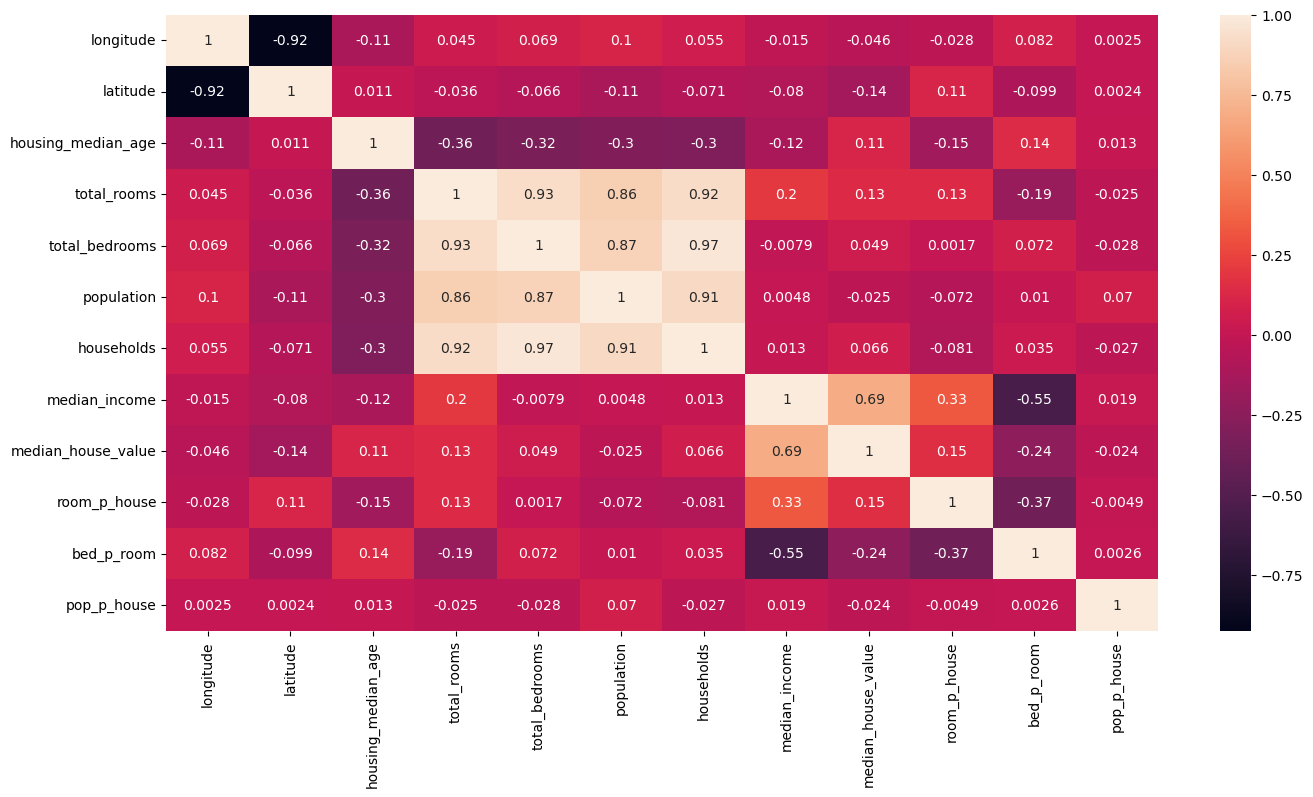

In [234]:
%%time
plt.figure(figsize = (16,8))
sns.heatmap(Df.corr(),annot = True)

### Categorical Features Conversion to NUMERICAL DATA TYPE USING ENCODING

In [235]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
Df['ocean_proximity'] = le.fit_transform(Df['ocean_proximity'])

In [236]:
Df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,room_p_house,bed_p_room,pop_p_house
0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,3,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,3,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,3,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,3,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,3,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374,845.0,330,1.5603,78100.0,1,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697,150,356.0,114,2.5568,77100.0,1,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254,485,1007.0,433,1.7000,92300.0,1,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860,409,741.0,349,1.8672,84700.0,1,2,5.329513,0.219892,2.123209


In [237]:
%%time
##  Df = Df.join(pd.get_dummies(Df.ocean_proximity)) is also an alternative to LabelEncoder

CPU times: total: 0 ns
Wall time: 0 ns


In [238]:
%%time
cor= Df.corr()
cor['median_house_value'].sort_values(ascending = False)

CPU times: total: 15.6 ms
Wall time: 15.6 ms


<timed exec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


median_house_value    1.000000
median_income         0.688075
room_p_house          0.151948
total_rooms           0.134153
housing_median_age    0.105623
ocean_proximity       0.081750
households            0.065843
total_bedrooms        0.049272
pop_p_house          -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bed_p_room           -0.236044
Name: median_house_value, dtype: float64

CPU times: total: 281 ms
Wall time: 259 ms


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'ocean_proximity'}>,
        <Axes: title={'center': 'room_p_house'}>,
        <Axes: title={'center': 'bed_p_room'}>],
       [<Axes: title={'center': 'pop_p_house'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

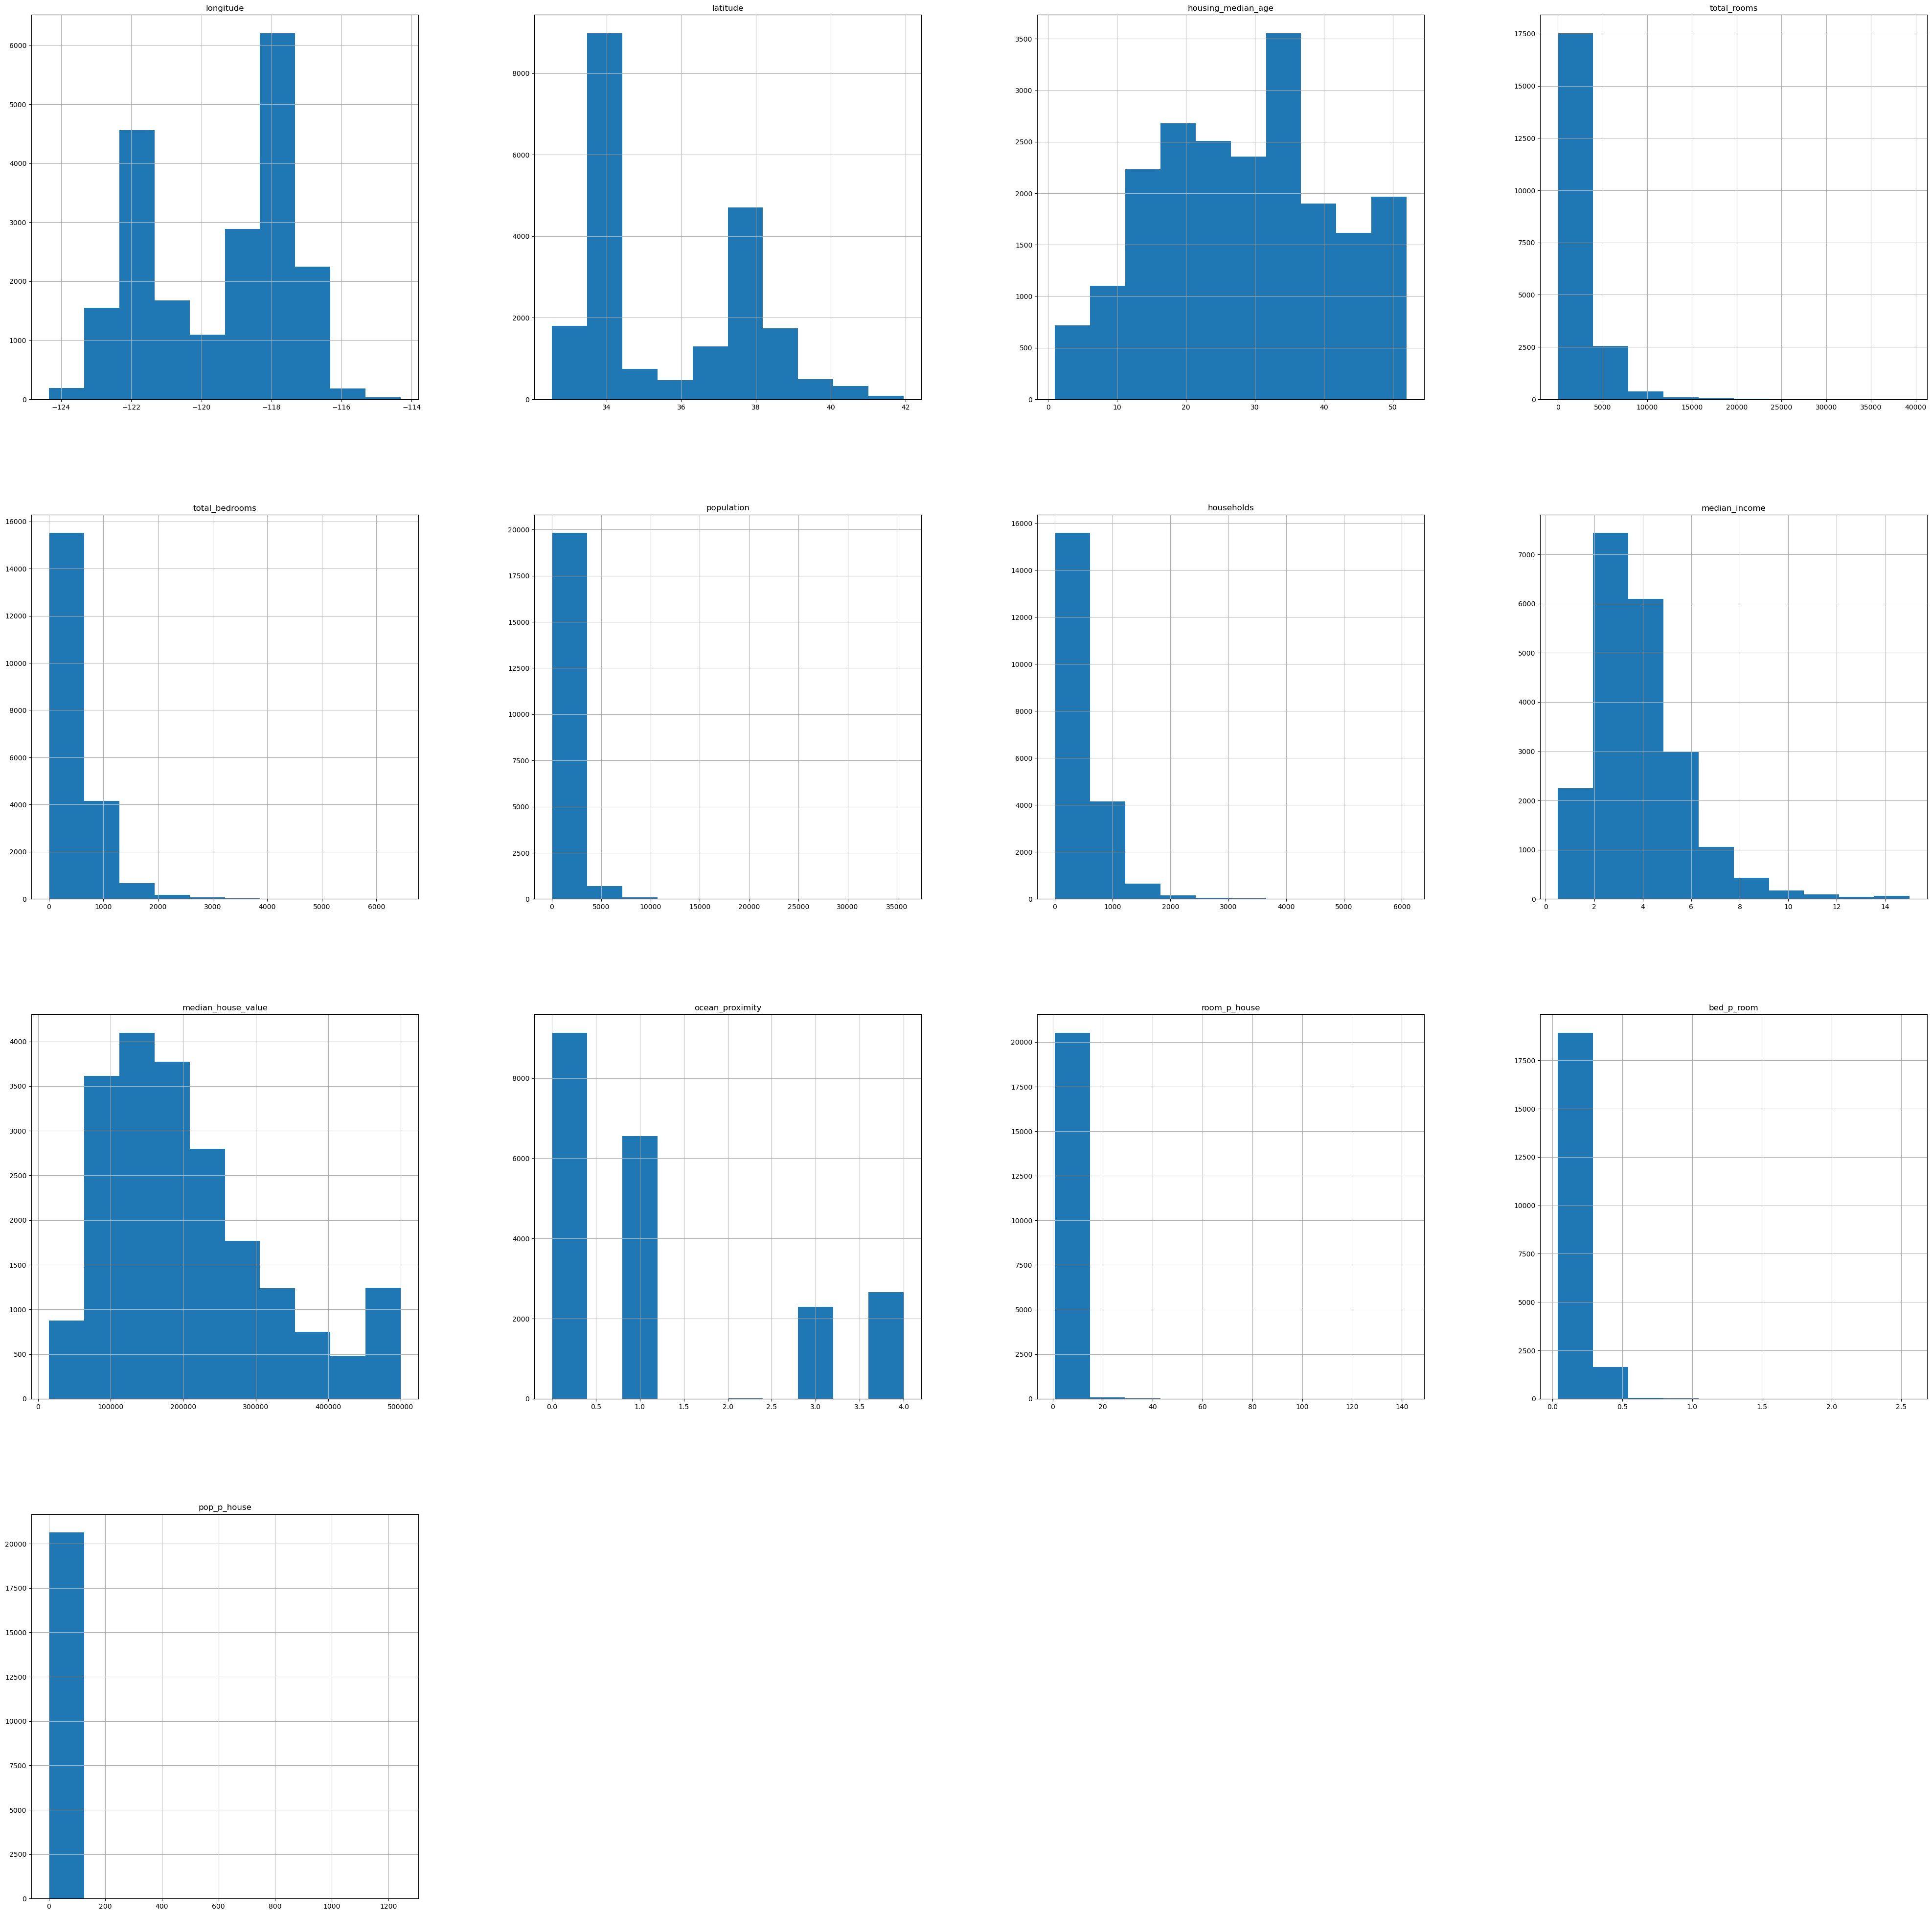

In [239]:
%%time
Df.hist(figsize = (50,50))

In [240]:
%%time
Df.head()

CPU times: total: 0 ns
Wall time: 0 ns


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,room_p_house,bed_p_room,pop_p_house
0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,3,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,3,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,3,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,3,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,3,3,6.281853,0.172096,2.181467


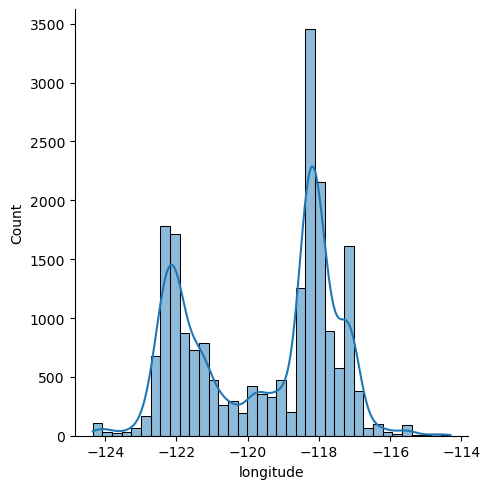

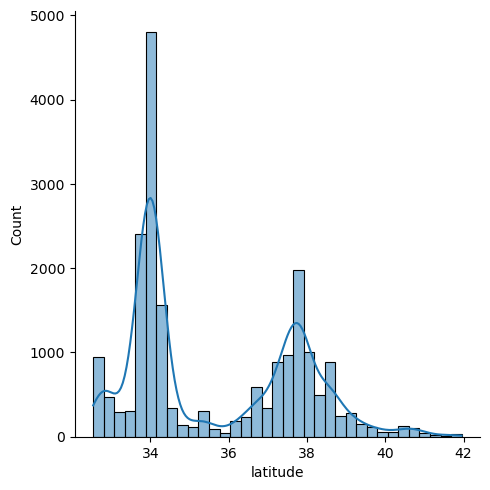

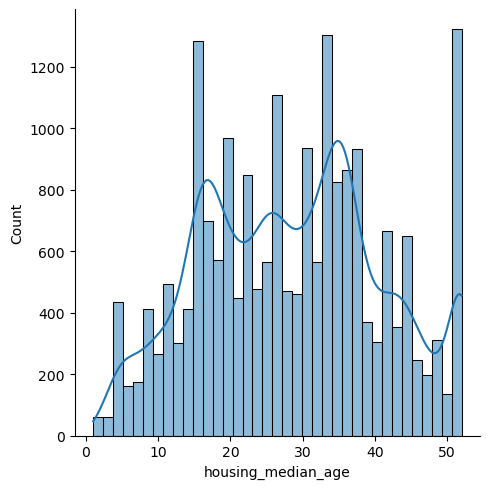

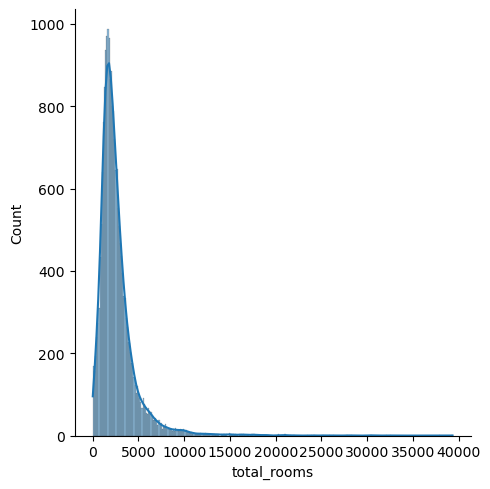

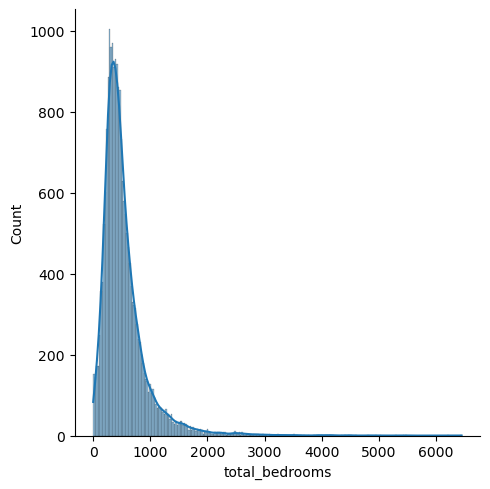

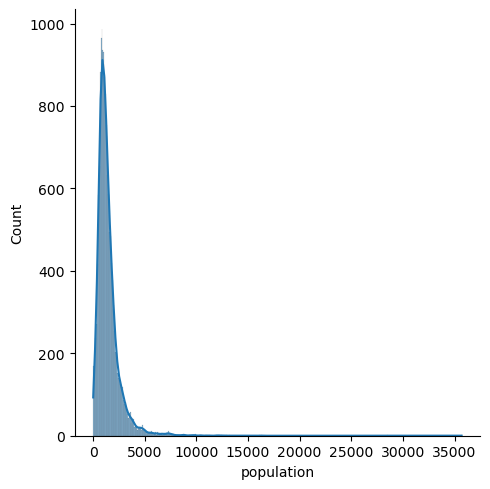

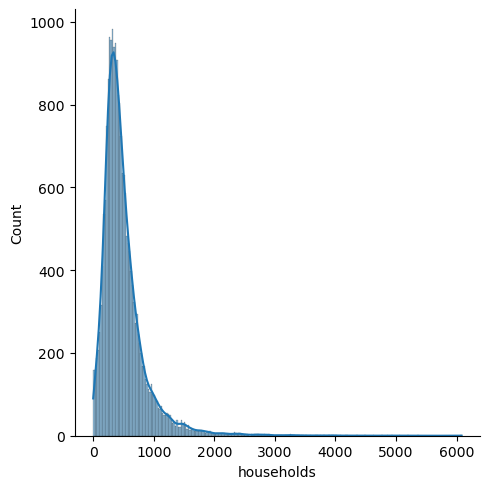

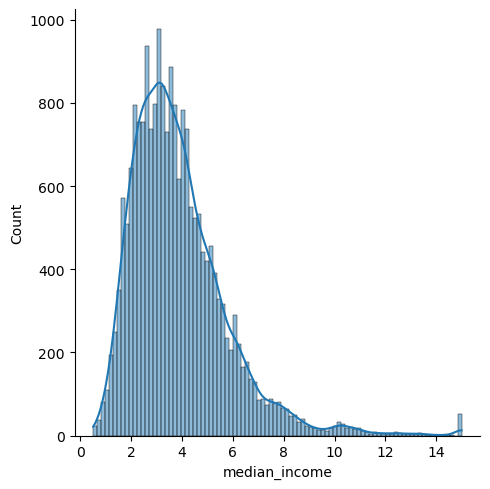

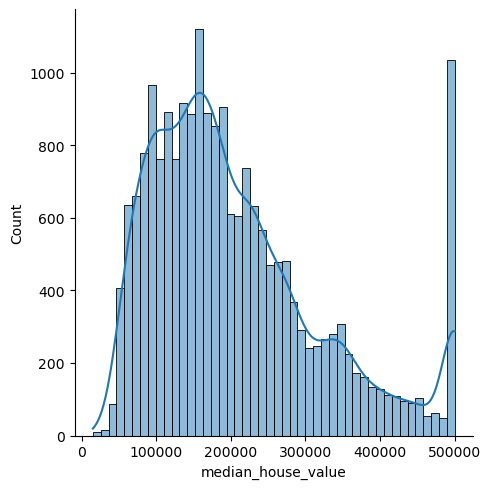

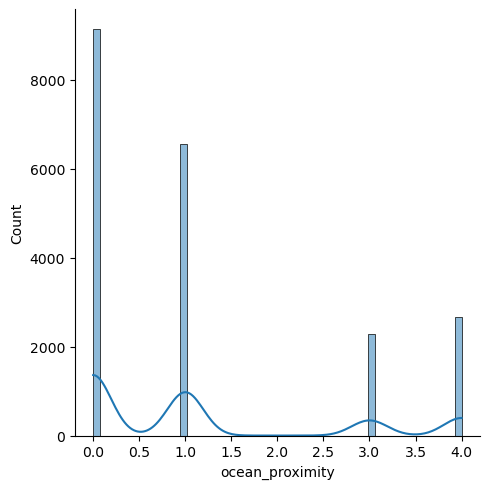

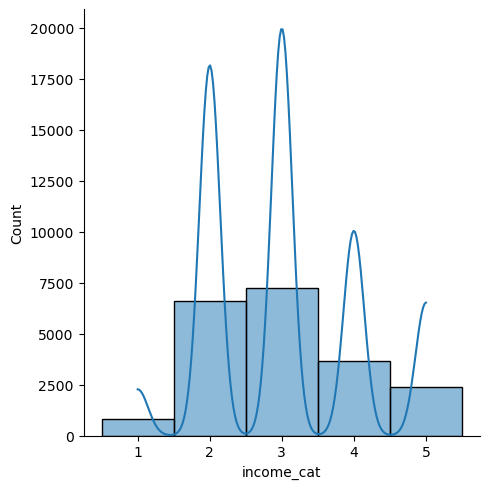

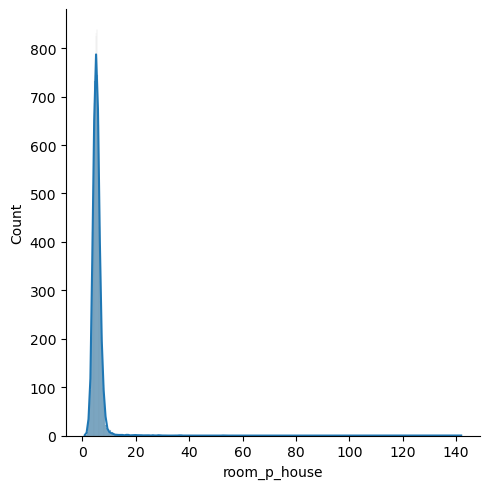

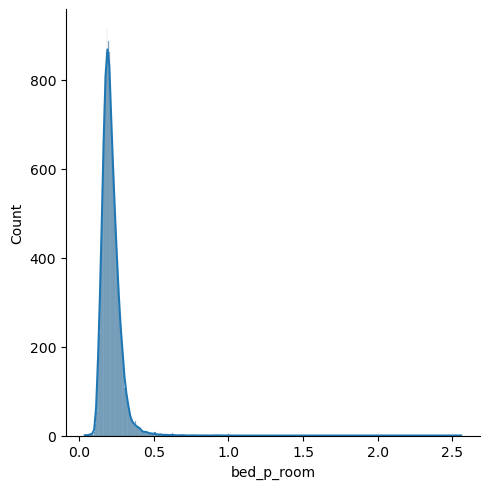

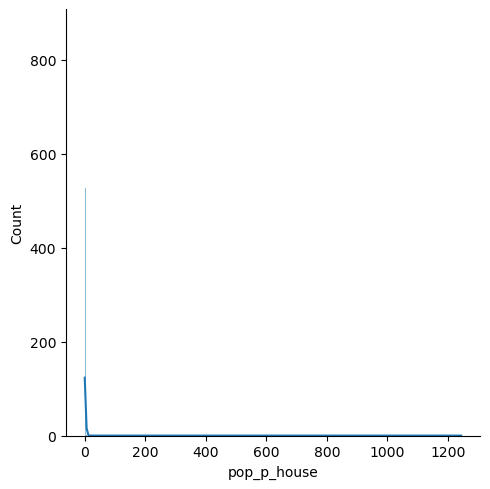

In [241]:
for i in Df.columns:
    sns.displot(Df[i],kde = True)

In [242]:
from scipy.stats import boxcox

In [243]:
Df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,room_p_house,bed_p_room,pop_p_house
0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,3,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,3,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,3,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,3,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,3,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374,845.0,330,1.5603,78100.0,1,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697,150,356.0,114,2.5568,77100.0,1,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254,485,1007.0,433,1.7000,92300.0,1,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860,409,741.0,349,1.8672,84700.0,1,2,5.329513,0.219892,2.123209


In [244]:
non_box = []
latlon =[] 
box = []
target=[]
for i in Df.columns:
    if i== 'ocean_proximity' or i=='income_cat':
        non_box.append(i)
    elif i=='latitude' or i=='longitude':
        latlon.append(i)
    elif i=='median_house_value':
        target.append(i)
    else:
        box.append(i)
        boxcox(Df[i])[0]

In [245]:
def custom_boxcox(A):
    for i in box:
        A[i] = boxcox(A[i])[0]

In [246]:
%%time
Df

CPU times: total: 0 ns
Wall time: 0 ns


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,room_p_house,bed_p_room,pop_p_house
0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,3,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,3,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,3,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,3,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,3,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374,845.0,330,1.5603,78100.0,1,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697,150,356.0,114,2.5568,77100.0,1,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254,485,1007.0,433,1.7000,92300.0,1,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860,409,741.0,349,1.8672,84700.0,1,2,5.329513,0.219892,2.123209


In [247]:
%%time
Df2= Df.copy()

CPU times: total: 0 ns
Wall time: 4.95 ms


# TRAIN_TEST_SPLIT

In [248]:
%%time
import sklearn 
from sklearn.model_selection import train_test_split

CPU times: total: 0 ns
Wall time: 0 ns


In [249]:
%%time
st_train_set, st_test_set = train_test_split(
    Df, test_size=0.2, stratify=Df["income_cat"], random_state=42)

CPU times: total: 15.6 ms
Wall time: 10 ms


In [250]:
%%time
st_train_set , st_val_set = train_test_split(st_train_set,test_size = 0.05, stratify = st_train_set["income_cat"],random_state = 42)

CPU times: total: 15.6 ms
Wall time: 7.98 ms


In [251]:
%%time
X_train = st_train_set.drop(['median_house_value'],axis = 1)
X_val = st_val_set.drop(['median_house_value'],axis =1)
X_test = st_test_set.drop(['median_house_value'],axis =1)

y_train = st_train_set['median_house_value']
y_val = st_val_set['median_house_value']
y_test = st_test_set['median_house_value']

CPU times: total: 0 ns
Wall time: 2.99 ms


In [252]:
%%time
print(X_train.shape,
X_val.shape,
X_test.shape)

(15686, 13) (826, 13) (4128, 13)
CPU times: total: 0 ns
Wall time: 0 ns


In [253]:
X_train_b = X_train.copy()
X_test_b = X_test.copy()
X_val_b = X_val.copy()

In [254]:
X_test_b.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,room_p_house,bed_p_room,pop_p_house
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.545981,35.602049,28.583818,2688.656250,548.357800,1448.634205,509.651163,3.849818,1.153101,5.383375,0.214137,2.967399
std,2.010400,2.127889,12.629796,2345.997876,452.001954,1197.164964,407.677609,1.879332,1.421838,1.822694,0.064727,1.584661
min,-124.180000,32.550000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,0.000000,0.846154,0.044374,1.089286
25%,-121.780000,33.920000,18.000000,1474.000000,302.750000,805.750000,283.000000,2.542675,0.000000,4.434273,0.175621,2.424681
50%,-118.460000,34.220000,28.000000,2159.500000,442.000000,1172.500000,416.000000,3.513200,1.000000,5.218307,0.203454,2.822308
75%,-117.980000,37.690000,37.000000,3171.250000,651.000000,1754.250000,613.250000,4.739225,1.000000,6.031716,0.240101,3.286534
max,-114.560000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,15.000100,4.000000,37.063492,1.183511,63.750000


## Boxcox Transformation to Numerical Non-Coordinate features

In [255]:
custom_boxcox(X_train)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,room_p_house,bed_p_room,pop_p_house
11364,-117.94,33.73,15.091836,23.466457,14.898433,22.481200,16.244313,1.774675,0,4,1.309794,-2.715708,0.940985
15158,-117.05,32.97,11.098117,29.203425,18.127561,26.957590,19.930333,1.844774,0,4,1.399948,-3.102559,0.926442
3590,-118.46,34.24,7.420743,24.996037,17.079739,23.248157,18.165626,1.425888,0,3,1.242115,-2.217198,0.792425
15955,-122.45,37.71,29.392150,18.354544,11.733065,17.782497,12.706082,1.425888,4,3,1.231226,-2.439501,0.920140
6688,-118.08,34.15,17.273304,10.476813,6.592339,9.396335,5.371264,-0.674459,1,1,1.444404,-1.983469,1.088640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14420,-117.22,32.80,14.536220,19.057846,13.595178,17.504546,14.470052,1.122606,4,2,1.073207,-1.756391,0.625409
20226,-119.30,34.29,16.190388,22.654950,16.055756,23.229522,17.248012,0.674365,4,2,1.122669,-1.903076,0.895145
3179,-119.77,36.32,9.296411,22.215726,14.262778,20.780926,15.494226,1.464061,1,3,1.279648,-2.581718,0.868978
5469,-118.47,33.99,21.984212,19.695149,14.916409,17.763360,15.686345,1.288017,0,3,0.986657,-1.420945,0.469237


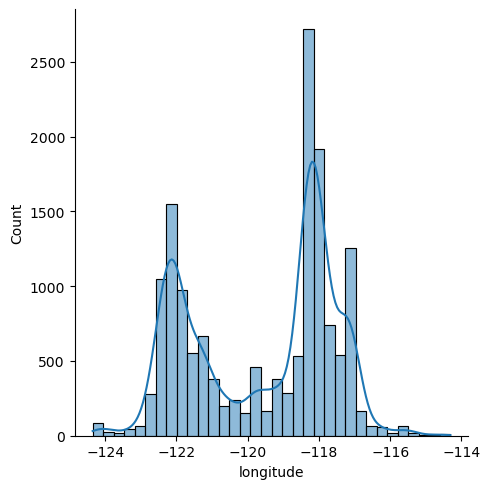

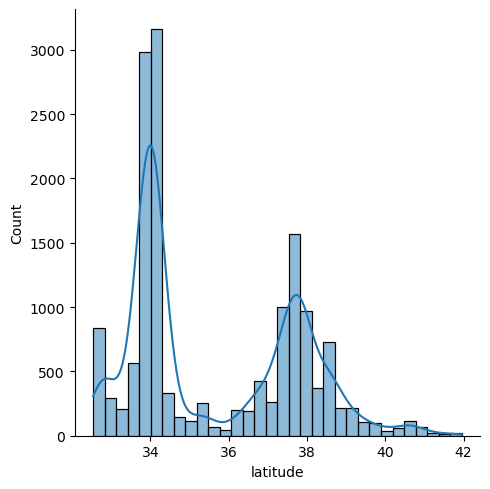

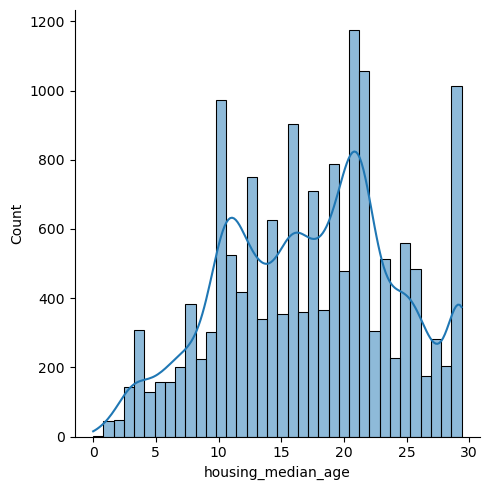

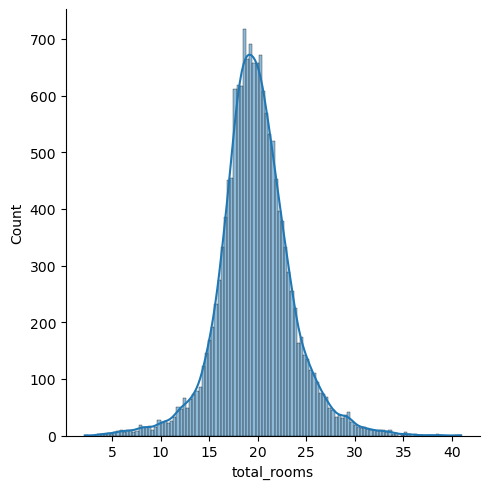

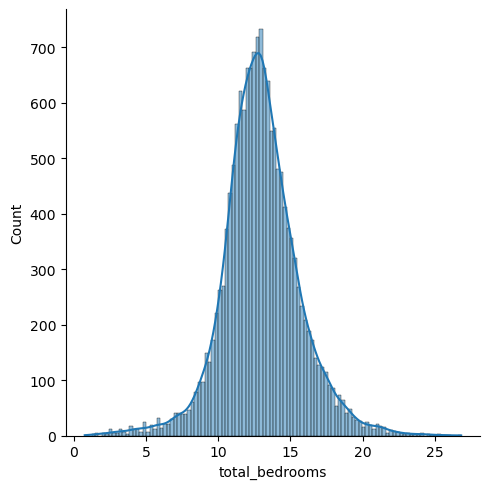

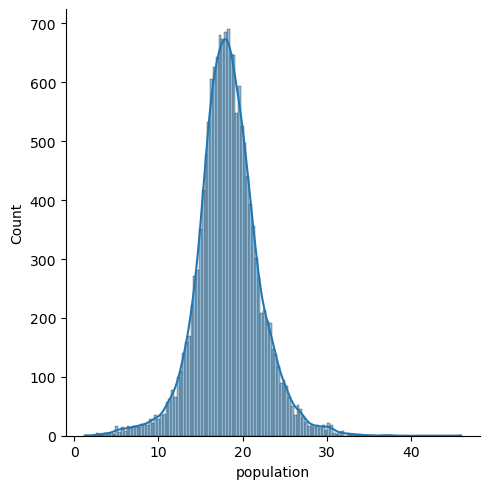

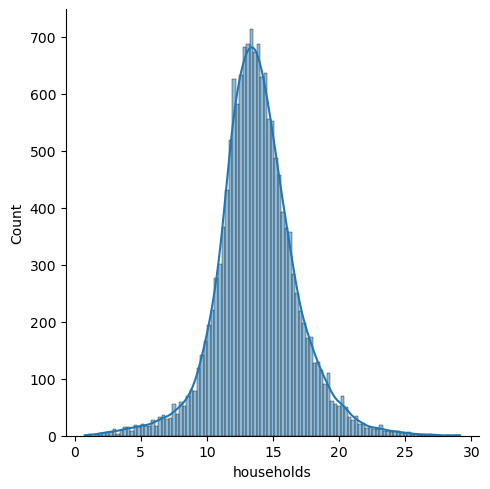

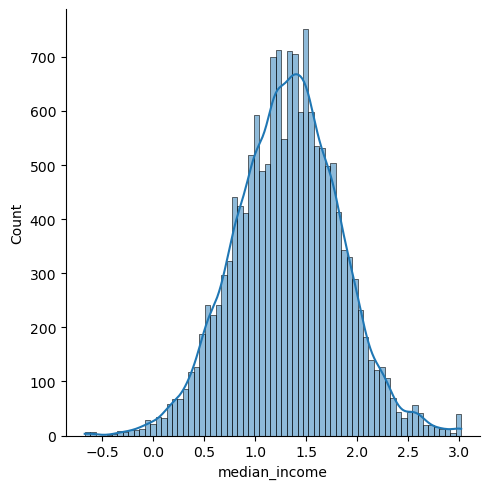

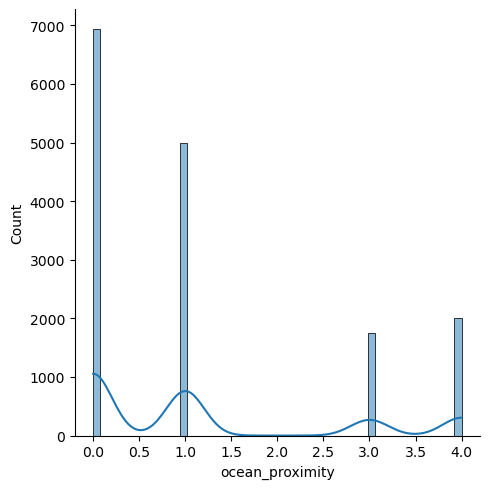

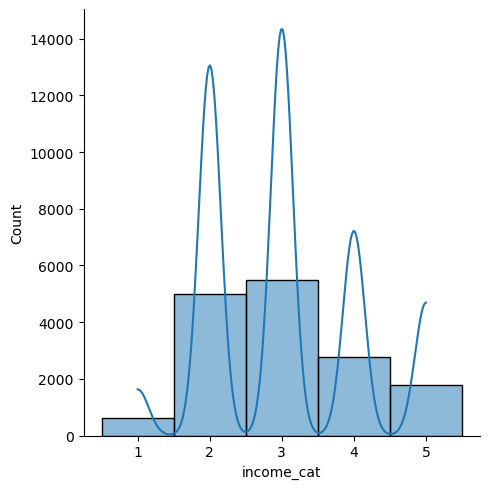

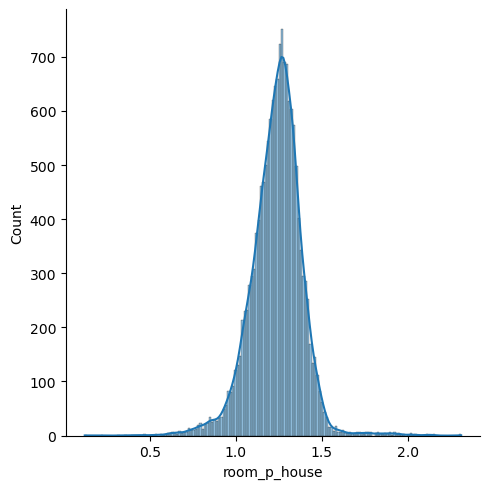

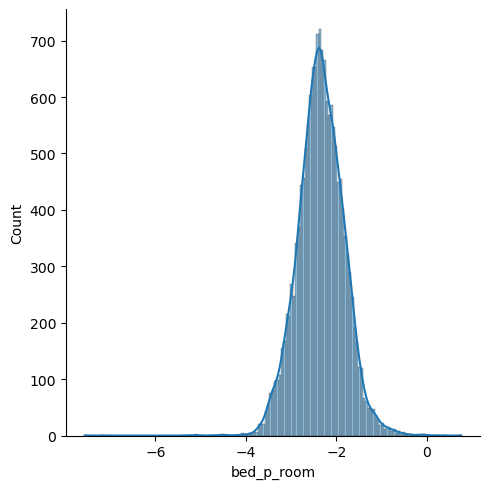

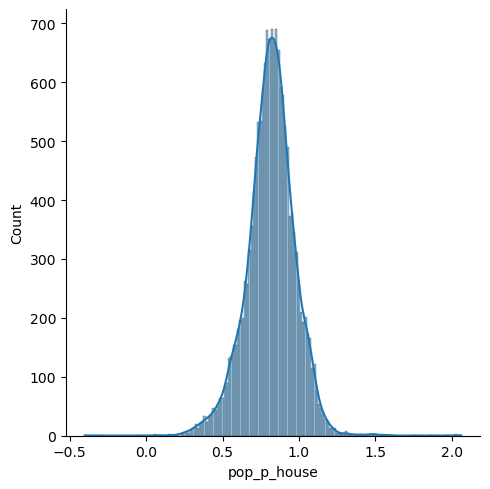

In [256]:
for i in X_train.columns:
    sns.displot(X_train[i],kde= True)

In [257]:
num= []
for i in X_train.columns:
    if (X_train[i].dtype) =='float64':
        num.append(i)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Feature'] = X_train[num].columns
vif['VIF'] = [variance_inflation_factor(X_train[num].values, i) for i in range(len(X_train[num].columns))]
vif.sort_values('VIF', ascending=False)

,Feature,VIF
3,total_rooms,8633.872697
4,total_bedrooms,8371.366045
6,households,5976.752565
5,population,2616.221534
0,longitude,2489.252765
8,room_p_house,1932.563215
9,bed_p_room,1043.075837
1,latitude,693.702293
10,pop_p_house,416.503155
7,median_income,18.115435


In [258]:
# dropping the TOP 3 features with highest VIF 
X_train = X_train.drop(['total_rooms','total_bedrooms','households'],axis = 1)

In [259]:
X_test = X_test.drop(['total_rooms','total_bedrooms','households'],axis = 1)
X_val = X_val.drop(['total_rooms','total_bedrooms','households'],axis = 1)

C:\Users\user\AppData\Local\Temp\ipykernel_15488\3961758373.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(X_train).corr(),annot = True)


<Axes: >

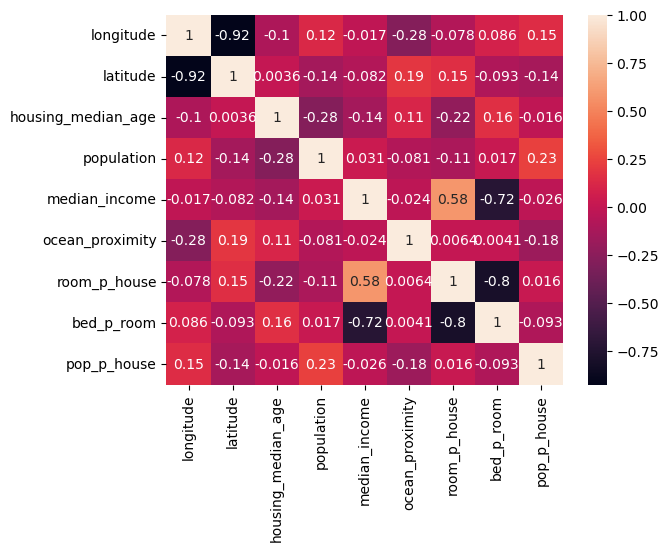

In [260]:
sns.heatmap(pd.DataFrame(X_train).corr(),annot = True)

In [261]:
X_train

,longitude,latitude,housing_median_age,population,median_income,ocean_proximity,income_cat,room_p_house,bed_p_room,pop_p_house
11364,-117.94,33.73,15.091836,22.481200,1.774675,0,4,1.309794,-2.715708,0.940985
15158,-117.05,32.97,11.098117,26.957590,1.844774,0,4,1.399948,-3.102559,0.926442
3590,-118.46,34.24,7.420743,23.248157,1.425888,0,3,1.242115,-2.217198,0.792425
15955,-122.45,37.71,29.392150,17.782497,1.425888,4,3,1.231226,-2.439501,0.920140
6688,-118.08,34.15,17.273304,9.396335,-0.674459,1,1,1.444404,-1.983469,1.088640
...,...,...,...,...,...,...,...,...,...,...
14420,-117.22,32.80,14.536220,17.504546,1.122606,4,2,1.073207,-1.756391,0.625409
20226,-119.30,34.29,16.190388,23.229522,0.674365,4,2,1.122669,-1.903076,0.895145
3179,-119.77,36.32,9.296411,20.780926,1.464061,1,3,1.279648,-2.581718,0.868978
5469,-118.47,33.99,21.984212,17.763360,1.288017,0,3,0.986657,-1.420945,0.469237


C:\Users\user\AppData\Local\Temp\ipykernel_15488\2621682239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(),annot= True)


<Axes: >

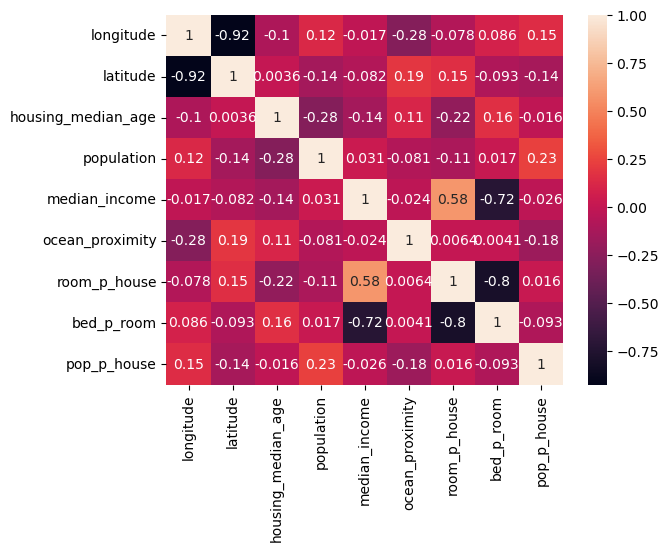

In [262]:
sns.heatmap(X_train.corr(),annot= True)

CPU times: total: 125 ms
Wall time: 122 ms


<timed exec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

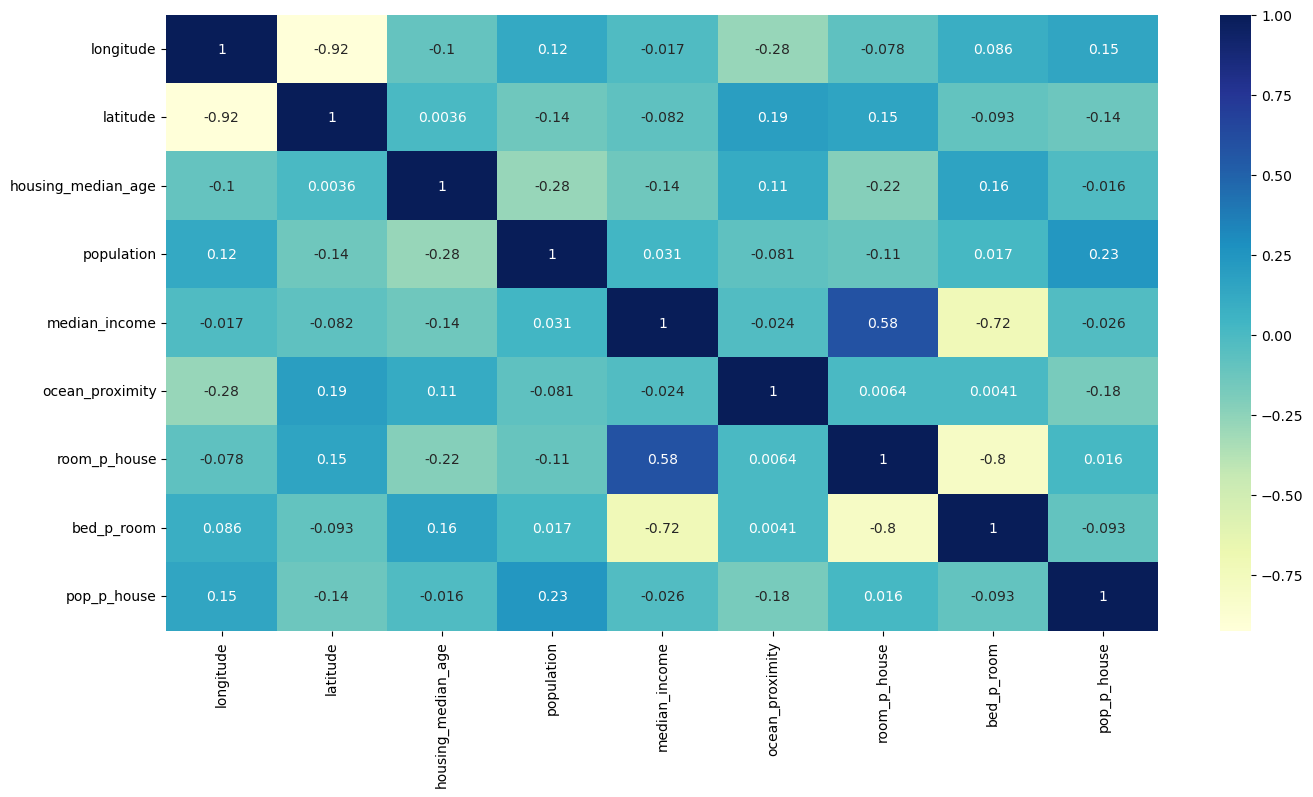

In [263]:
%%time
plt.figure(figsize = (16,8))
sns.heatmap(X_train.corr(),annot = True,cmap = 'YlGnBu')

In [264]:
%%time
X_train.drop(['income_cat'],axis = 1,inplace = True)
X_test.drop(['income_cat'],axis = 1,inplace = True)
X_val.drop(['income_cat'],axis = 1,inplace = True)

CPU times: total: 0 ns
Wall time: 2 ms


In [265]:
X_train_2 = X_train.copy()

In [266]:
ocean = X_train.ocean_proximity
X_train = X_train.drop(['ocean_proximity'],axis= 1)
X_train['ocean_proximity'] = ocean

In [267]:
X_train

,longitude,latitude,housing_median_age,population,median_income,room_p_house,bed_p_room,pop_p_house,ocean_proximity
11364,-117.94,33.73,15.091836,22.481200,1.774675,1.309794,-2.715708,0.940985,0
15158,-117.05,32.97,11.098117,26.957590,1.844774,1.399948,-3.102559,0.926442,0
3590,-118.46,34.24,7.420743,23.248157,1.425888,1.242115,-2.217198,0.792425,0
15955,-122.45,37.71,29.392150,17.782497,1.425888,1.231226,-2.439501,0.920140,4
6688,-118.08,34.15,17.273304,9.396335,-0.674459,1.444404,-1.983469,1.088640,1
...,...,...,...,...,...,...,...,...,...
14420,-117.22,32.80,14.536220,17.504546,1.122606,1.073207,-1.756391,0.625409,4
20226,-119.30,34.29,16.190388,23.229522,0.674365,1.122669,-1.903076,0.895145,4
3179,-119.77,36.32,9.296411,20.780926,1.464061,1.279648,-2.581718,0.868978,1
5469,-118.47,33.99,21.984212,17.763360,1.288017,0.986657,-1.420945,0.469237,0


In [268]:
oceant = X_test['ocean_proximity']
X_test = X_test.drop(['ocean_proximity'],axis = 1)
X_test['ocean_proximity'] = oceant

In [269]:
oceanv = X_val['ocean_proximity']
X_val = X_val.drop(['ocean_proximity'],axis = 1)
X_val['ocean_proximity'] = oceanv

In [270]:
X_test

,longitude,latitude,housing_median_age,population,median_income,room_p_house,bed_p_room,pop_p_house,ocean_proximity
5241,-118.39,34.12,29.0,2184.0,8.2816,6.715625,0.156972,2.275000,0
17352,-120.42,34.89,24.0,855.0,5.0099,7.137809,0.151980,3.021201,0
3505,-118.45,34.25,36.0,808.0,4.3839,5.283636,0.185822,2.938182,0
7777,-118.10,33.91,35.0,1072.0,3.2708,5.491694,0.196612,3.561462,0
14155,-117.07,32.77,38.0,1495.0,4.3529,6.154723,0.162477,2.434853,4
...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,1207.0,2.8170,6.108696,0.189947,3.279891,0
7275,-118.24,33.99,33.0,1270.0,2.1615,3.138298,0.332203,4.503546,0
17223,-119.72,34.44,43.0,663.0,4.7000,4.974860,0.192027,1.851955,0
10786,-117.91,33.63,30.0,1081.0,4.9125,5.026699,0.198938,2.623786,0


In [271]:
for i in X_test.columns[2:8]:
    X_test[i]=(boxcox(X_test[i]))[0]

In [272]:
for i in X_val.columns[2:8]:
    X_val[i]=(boxcox(X_val[i]))[0]

In [273]:
X_test

,longitude,latitude,housing_median_age,population,median_income,room_p_house,bed_p_room,pop_p_house,ocean_proximity
5241,-118.39,34.12,17.434379,20.948909,2.417560,1.716717,-2.678449,0.673819,0
17352,-120.42,34.89,14.795707,16.069097,1.783997,1.765908,-2.743789,0.849038,0
3505,-118.45,34.25,20.984657,15.806950,1.622287,1.519960,-2.349964,0.832909,0
7777,-118.10,33.91,20.486360,17.152281,1.276688,1.552002,-2.244658,0.939819,0
14155,-117.07,32.77,21.973255,18.850182,1.613765,1.645766,-2.609638,0.718057,4
...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,12.046647,17.743059,1.105236,1.639628,-2.308742,0.895306,0
7275,-118.24,33.99,19.481308,18.001417,0.808907,1.074104,-1.366117,1.057039,0
17223,-119.72,34.44,24.401834,14.916056,1.706303,1.469729,-2.288413,0.530231,0
10786,-117.91,33.63,17.951010,17.193401,1.760043,1.478400,-2.223001,0.765033,0


In [274]:
X_val

,longitude,latitude,housing_median_age,population,median_income,room_p_house,bed_p_room,pop_p_house,ocean_proximity
15820,-122.42,37.75,24.311194,25.379241,0.789169,1.111730,-1.571361,0.782225,3
1016,-121.76,37.67,3.767816,22.763035,2.062052,1.882905,-3.112743,0.744901,1
20086,-120.30,37.99,12.602056,21.188226,0.973483,1.642797,-2.682996,0.747906,1
7630,-118.28,33.83,10.268279,32.878718,1.337293,1.510908,-2.264557,0.810778,0
3928,-118.55,34.19,18.147092,16.599428,1.686399,1.641231,-3.072181,0.711369,0
...,...,...,...,...,...,...,...,...,...
2946,-118.99,35.35,14.377020,23.661194,0.523815,1.594433,-2.454014,0.983481,1
8324,-118.30,33.95,17.741088,21.138523,0.476102,1.439700,-2.078627,0.895012,0
1534,-122.05,37.89,18.550258,18.825170,1.576813,1.795110,-3.304288,0.701650,3
16252,-121.27,37.96,20.914639,19.357724,0.700583,1.528285,-2.312223,0.915912,1


### MinMax Scaling to Latitiude and Longitude

In [275]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()

In [276]:
X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])

In [277]:
X_test.iloc[:,:2] = mm.fit_transform(X_test.iloc[:,:2])
X_val.iloc[:,:2] = mm.fit_transform(X_val.iloc[:,:2])

## Conversion from Pandas DataFrame to Numpy Arrays :
   For faster computation

## DataFrame to Numpy Arrays

In [279]:
%%time
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()

CPU times: total: 0 ns
Wall time: 2 ms


In [280]:
# all the training datasets are converted to NUMPY 2_D ARRAYS for preprocessing using STANDARD_SCALER

# Preprocessing using StandardScaler()

In [281]:
X_train

array([[ 0.63844622,  0.12646121, 15.0918363 , ..., -2.71570789,
         0.94098468,  0.        ],
       [ 0.72709163,  0.04569607, 11.09811715, ..., -3.10255894,
         0.92644206,  0.        ],
       [ 0.58665339,  0.18065887,  7.42074285, ..., -2.21719827,
         0.79242499,  0.        ],
       ...,
       [ 0.4561753 ,  0.40170032,  9.29641117, ..., -2.58171753,
         0.86897788,  1.        ],
       [ 0.58565737,  0.15409139, 21.98421217, ..., -1.42094523,
         0.46923733,  0.        ],
       [ 0.58665339,  0.17215728, 17.27330437, ..., -2.16027353,
         0.64413316,  0.        ]])

In [282]:
%%time
from sklearn.preprocessing import StandardScaler 
import numpy as np
scaler = StandardScaler().fit(X_train[:,2:8])

def preprocessor(X):
    A= np.copy(X)
    A[:,2:8]=scaler.transform(A[:,2:8]) # ONLY THE NUMERICAL FEATURES : CATEGORICAL FEATURES NOT INCLUDED
    return A
X_train_pp=preprocessor(X_train)

CPU times: total: 31.2 ms
Wall time: 3.99 ms


In [283]:
%%time
pd.DataFrame(X_train_pp)

CPU times: total: 0 ns
Wall time: 0 ns


,0,1,2,3,4,5,6,7,8
0,0.638446,0.126461,-0.326145,1.144171,0.877041,0.492512,-0.730740,0.792989,0.0
1,0.727092,0.045696,-0.908027,2.358565,1.012263,1.095177,-1.486015,0.700980,0.0
2,0.586653,0.180659,-1.443818,1.352237,0.204224,0.040084,0.242534,-0.146934,0.0
3,0.189243,0.549416,1.757402,-0.130535,0.204224,-0.032704,-0.191483,0.661104,4.0
4,0.624502,0.171095,-0.008306,-2.405608,-3.847385,1.392360,0.698859,1.727189,1.0
...,...,...,...,...,...,...,...,...,...
15681,0.710159,0.027630,-0.407098,-0.205940,-0.380812,-1.089042,1.142200,-1.203630,4.0
15682,0.502988,0.185972,-0.166087,1.347182,-1.245478,-0.758394,0.855817,0.502965,4.0
15683,0.456175,0.401700,-1.170535,0.682905,0.277861,0.290988,-0.469141,0.337409,1.0
15684,0.585657,0.154091,0.678070,-0.135727,-0.061732,-1.667615,1.797113,-2.191712,0.0


CPU times: total: 172 ms
Wall time: 165 ms


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>]], dtype=object)

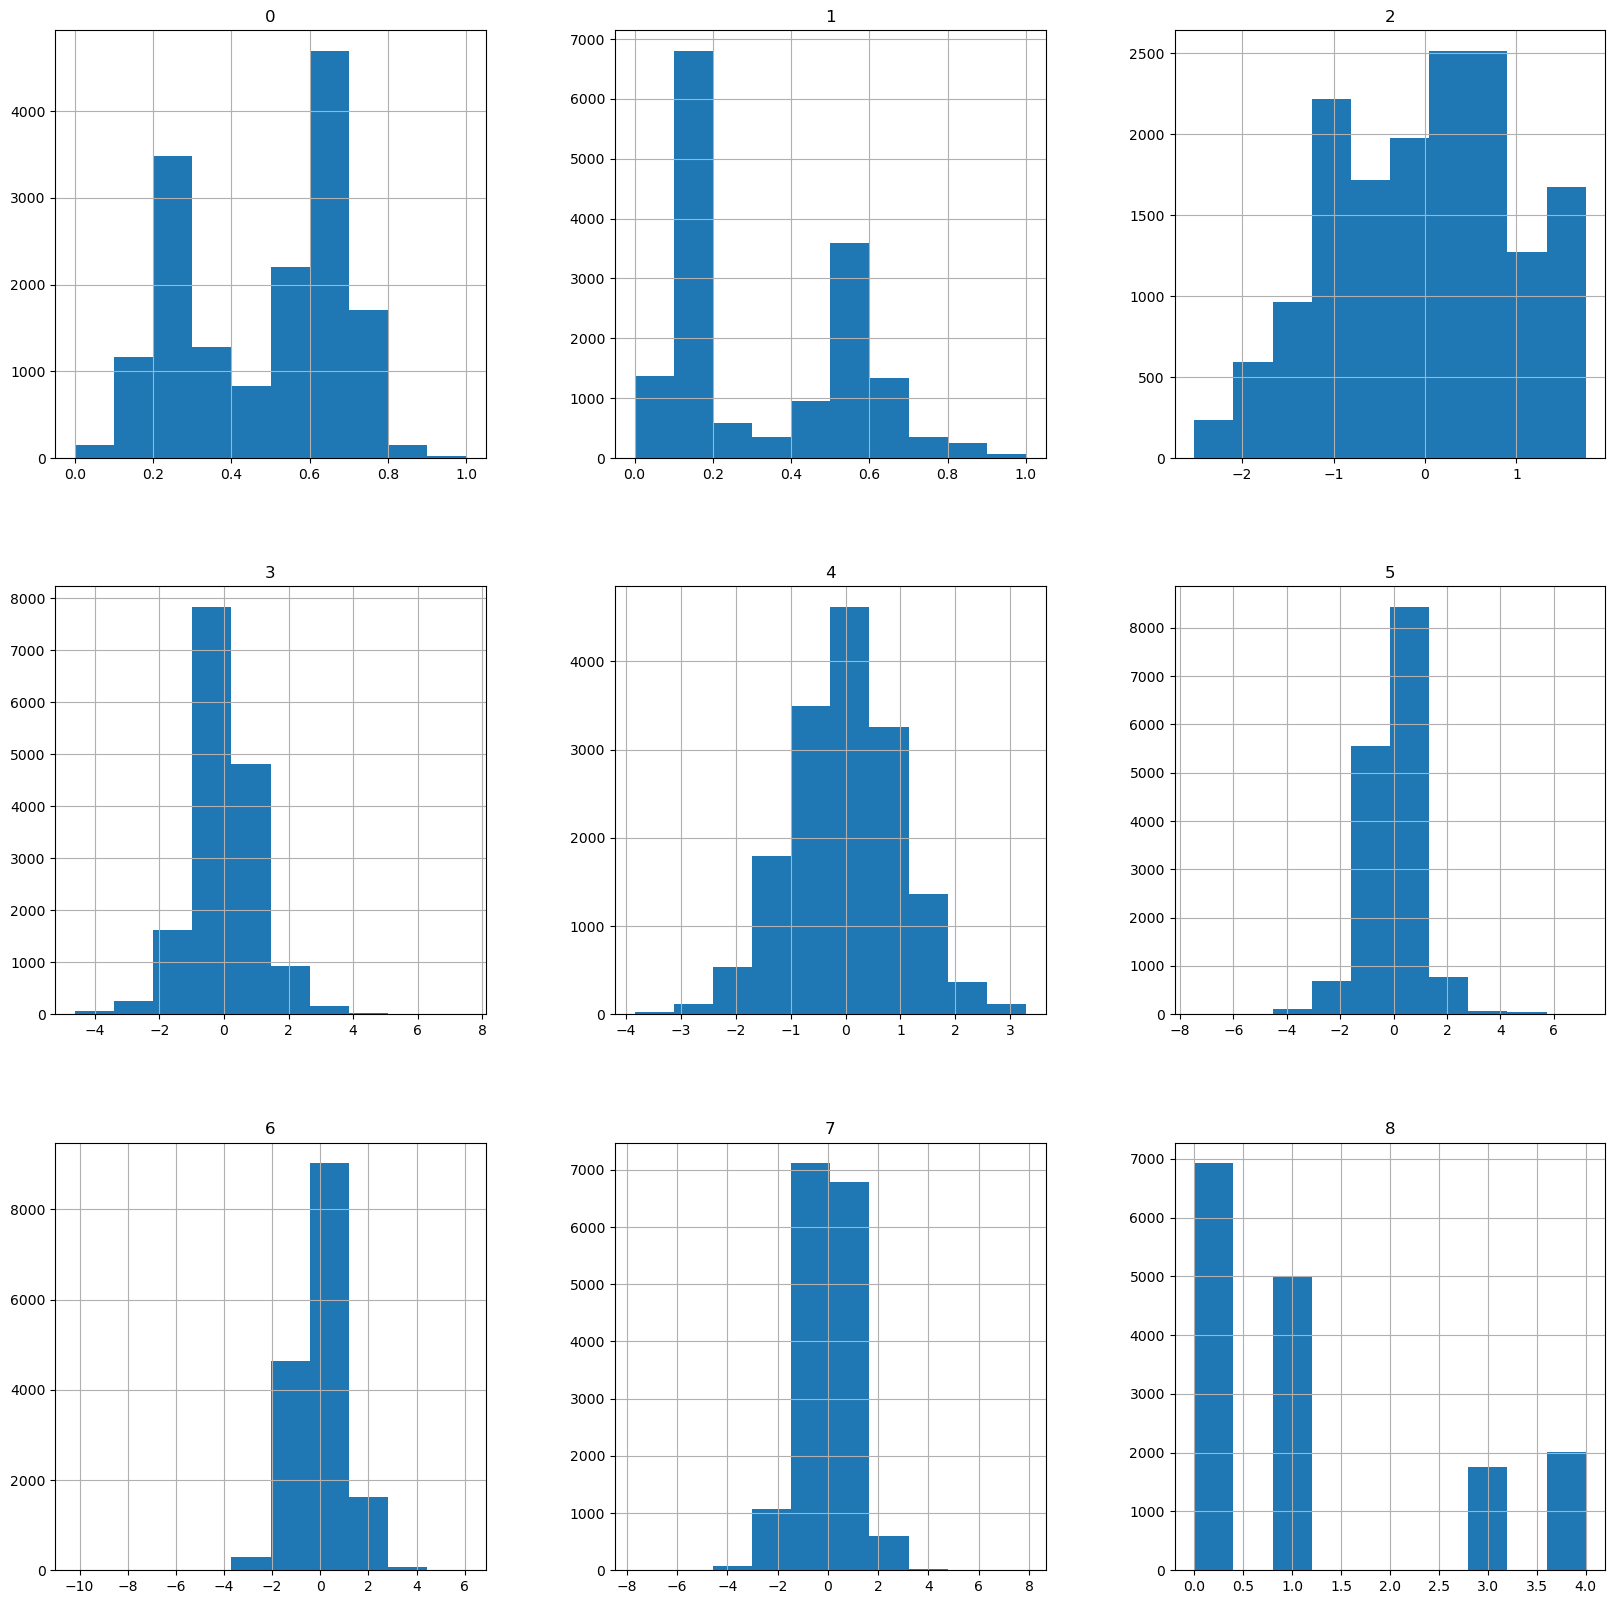

In [284]:
%%time
pd.DataFrame(X_train_pp).hist(figsize = (20,20))

In [285]:
%%time
X_val_pp=preprocessor(X_val)
X_test_pp = preprocessor(X_test)

CPU times: total: 0 ns
Wall time: 998 µs


# MODEL FITTING

## Linear Regression

In [287]:
%%time
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
lin_reg = reg.fit(X_train_pp , y_train)
lin_reg.score(X_train_pp,y_train)
print('TRAINING MSE ',mse(lin_reg.predict(X_train_pp),y_train,squared = False))
print('SINGLE SET VALIDATION ERROR',mse(lin_reg.predict(X_val_pp),y_val,squared = False))
from sklearn.model_selection import cross_val_score
# computes the error stats for the linear model
            # negative cross_val (intializer of the ML model, X_train_pp,y_train,scoring = 'neg_root_mse',cv = no. of folds / strata
            # each of which is used as a seperate validation set one by one
lin_rmses = -cross_val_score(reg, X_train_pp,y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()
print('10 fold cross val error  = ',pd.Series(lin_rmses).mean())
print('TRAINING SET MSE and CrossVal Error are almost the same. Validation set error is a little bit higher.')
print('\n Less Chance of Overfitting but may be UnderFitting \n To be Verified Later on \n')

TRAINING MSE  71417.5828915736
SINGLE SET VALIDATION ERROR 73629.78542998836
10 fold cross val error  =  71462.07540520464
TRAINING SET MSE and CrossVal Error are almost the same. Validation set error is a little bit higher.

 Less Chance of Overfitting but may be UnderFitting 
 To be Verified Later on 

CPU times: total: 172 ms
Wall time: 61.1 ms


In [288]:
%%time
print('Linear Regression predictions')
OLS = pd.DataFrame( {'Yhat': reg.predict(X_train_pp),
 'Y':y_train, 'res': y_train -reg.predict(X_train_pp)})

Linear Regression predictions
CPU times: total: 0 ns
Wall time: 3 ms


In [289]:
OLS

,Yhat,Y,res
0,256315.643200,211400.0,-44915.643200
1,254504.510368,194300.0,-60204.510368
2,225581.232110,170700.0,-54881.232110
3,253658.745455,261600.0,7941.254545
4,-113581.745442,500001.0,613582.745442
...,...,...,...
15681,230716.456080,183300.0,-47416.456080
15682,149311.466494,160500.0,11188.533506
15683,178946.867031,92500.0,-86446.867031
15684,309047.154292,267500.0,-41547.154292


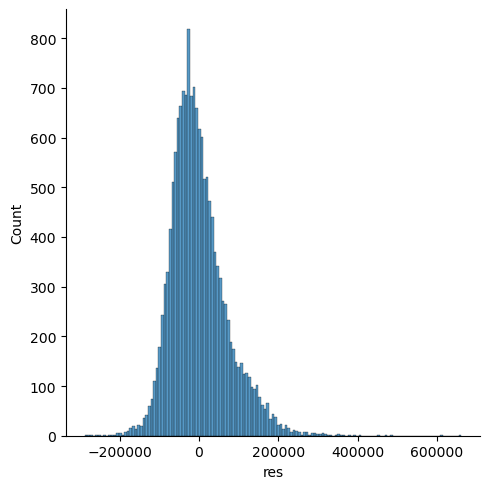

In [291]:
sns.displot(data = OLS['res'])

### Normality of Residuals 

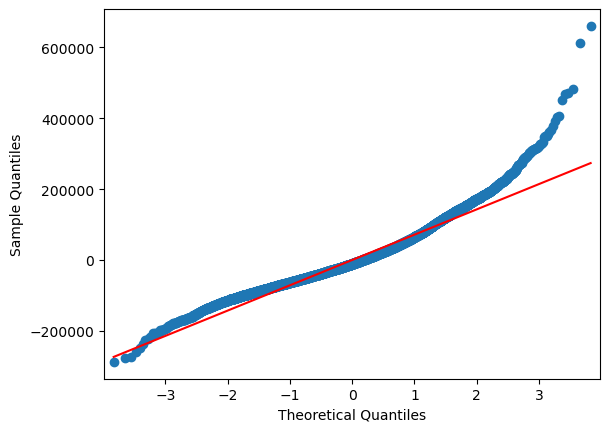

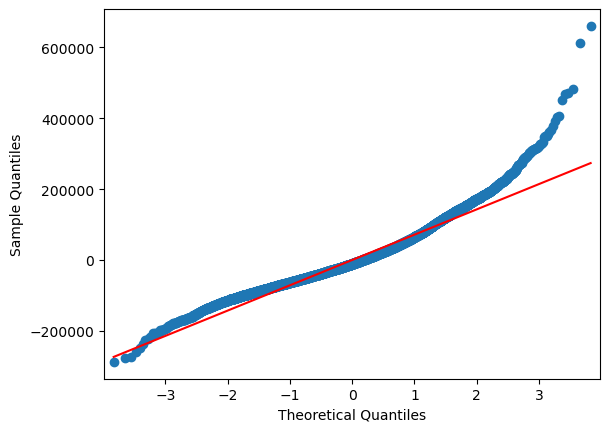

In [292]:
from statsmodels.graphics.gofplots import qqplot
qqplot(OLS['res'], line='s')

In [298]:
from scipy import stats as st
st.shapiro(OLS.iloc[:, 2])

ShapiroResult(statistic=0.9528619647026062, pvalue=0.0)

In [299]:
st.kstest(OLS.iloc[:,2], st.norm.cdf)

KstestResult(statistic=0.567193675889328, pvalue=0.0, statistic_location=-30.237877041683532, statistic_sign=1)

##### Since p-val < 0.05 we may reject null hypothesis at 5% LOS.
##### Hence assumption of normality not met

### AUTOCORRELATION 

In [293]:
from statsmodels.stats.stattools import durbin_watson

In [294]:
durbin_watson(OLS.res, axis=0)

2.010987727003097

##### Strong evidence against 1st degree auto-correlation

### Linearity And Homoscedasticity

In [295]:
Z_OLS = pd.DataFrame(scaler.fit_transform(OLS))

<Axes: xlabel='0', ylabel='2'>

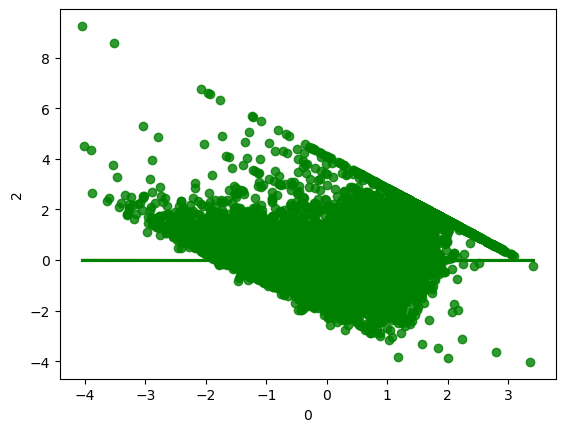

In [300]:
sns.regplot(data = Z_OLS , x = Z_OLS[0], y=Z_OLS[2],color= 'green')

In [304]:
X_train_pp

array([[ 0.63844622,  0.12646121, -0.326145  , ..., -0.73073988,
         0.79298931,  0.        ],
       [ 0.72709163,  0.04569607, -0.90802732, ..., -1.48601545,
         0.70097952,  0.        ],
       [ 0.58665339,  0.18065887, -1.44381841, ...,  0.24253432,
        -0.14693384,  0.        ],
       ...,
       [ 0.4561753 ,  0.40170032, -1.17053473, ..., -0.4691414 ,
         0.33740912,  1.        ],
       [ 0.58565737,  0.15409139,  0.67806975, ...,  1.7971132 ,
        -2.19171163,  0.        ],
       [ 0.58665339,  0.17215728, -0.0083065 , ...,  0.35367234,
        -1.08516226,  0.        ]])

In [309]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
test_result = sms.het_breuschpagan(OLS.res, X_train_pp)
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
lzip(names, test_result)

[('Lagrange multiplier statistic', 3057.5457662301706),
 ('p-value', 0.0),
 ('f-value', 421.7384724112601),
 ('f p-value', 0.0)]

##### p-value <0.05. Hence strong evidence against Homoscedasticity by Breuch-Pagan Test

### Non-linearity in data and the residuals are heteroscedastic

<Axes: xlabel='Y', ylabel='Yhat'>

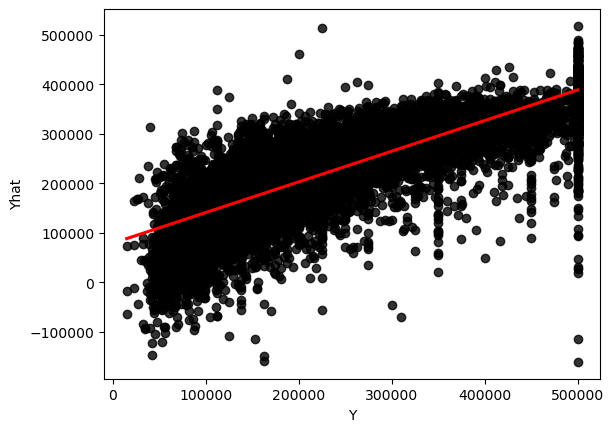

In [301]:
sns.regplot(data = OLS , x= 'Y', y= 'Yhat',scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [302]:
OLS[OLS.Yhat<=0]

,Yhat,Y,res
4,-113581.745442,500001.0,613582.745442
144,-17473.430648,14999.0,32472.430648
303,-108488.843244,125000.0,233488.843244
359,-24192.244637,40000.0,64192.244637
393,-7878.439358,56400.0,64278.439358
...,...,...,...
15493,-23574.931135,46700.0,70274.931135
15515,-1222.117947,75800.0,77022.117947
15542,-18465.221995,61900.0,80365.221995
15621,-32119.435327,56500.0,88619.435327


#### FIRST 4 Assumptions not met even after trying hence LINEAR REGRESSION is not a good approach for
## MEDIAN HOUSE PRICE prediction for California Census blocks
#### 1) Multi-collinearity : Reduced a lot but not completely absent 
#### 2) Normality of Residuals : Strong evidence against it
#### 3) Highly Heteroscedastic By Bruech Pagan Test
#### 4) Target variable not linearly related to independent features (from Std. Residual plot wrt Std.Y pred)
#### 5) Lack of Auto-correlation(1st degree) : True under Durbin-Watson

**FURTHERMORE, WE ARE ALSO OBTAINING NEGATIVE PREDICTED VALUES , This is not Suitable for a Price Prediction Model since it is a positive valued target feature.**


In [316]:
print(100*sum(abs((OLS.Y-OLS.Yhat)/OLS.Y))/len(OLS),'% MAPE')

32.98981442889592 % MAPE


In [315]:
from sklearn.metrics import r2_score as r2
r2(OLS.Yhat,y_train)

0.3846097911527655

**R-square value is only 0.38 and also the MAPE is 32.98%. These parameters suggest that the model is not accurate enough**



### WE CAN STRONGLY TESTIFY AGAINST THE USAGE OF LINEAR REGRESSION METHOD

*We shall be using more robust Ensemble Methods which are non-parametric in nature*

#### TEST DATASET Model Evaluation Parameters

In [332]:
print(" \n R-square value ",r2(reg.predict(X_test_pp),y_test), ' \n MSE value \t ',mse(reg.predict(X_test_pp),y_test,squared = False)
     )

 
 R-square value  0.4192242465251791  
 MSE value 	  72888.36290145454


In [325]:
print(100*sum(abs((y_test-reg.predict(X_test_pp))/y_test))/len(y_test),'% MAPE')

37.40551326028143 % MAPE
